In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
# 对电影进行基本的分析

In [2]:
# 使用电影名替换电影ID
movies_1 = pd.read_csv("../data/ml-1m/movies.dat",
                       sep="::",
                       header=None,
                       engine='python',
                       encoding='ISO8859')
movies_1.columns = ['MovieID','Title','Genres']
movies_1.index = movies_1['MovieID']
movies_1.drop(['MovieID'], axis=1, inplace=True)
movies_1

,Title,Genres
MovieID,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [4]:
movies_2 = movies_1.copy()
movies_2['year'] = 0
for (idx, row), r in zip(movies_1.iterrows(), range(40000)):
    movies_2.loc[idx, 'year'] = int(row['Title'][-5:-1])
    for genres in row['Genres'].split('|'):
        if genres not in movies_2.columns:
            movies_2[genres] = 0
        movies_2.loc[idx, genres] = 1
    movies_2.loc[idx, 'Title'] = row['Title'][:-7].split(",")[0].split("(")[0]
movies_2.drop(['Genres'], axis=1, inplace=True)
movies_2

,Title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
MovieID,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale,1995,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,Meet the Parents,2000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,Requiem for a Dream,2000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3950,Tigerland,2000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# 做一下统计
movies_2.describe()

,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,1986.066959,0.027041,0.064641,0.309039,0.072882,0.017512,0.121298,0.412825,0.129539,0.054339,0.126706,0.088334,0.071079,0.032707,0.036827,0.029359,0.027298,0.011331,0.017512
std,16.895690,0.162224,0.245923,0.462157,0.259976,0.131187,0.326515,0.492405,0.335839,0.226715,0.332686,0.283816,0.256990,0.177891,0.188362,0.168832,0.162973,0.105858,0.131187
min,1919.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1997.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


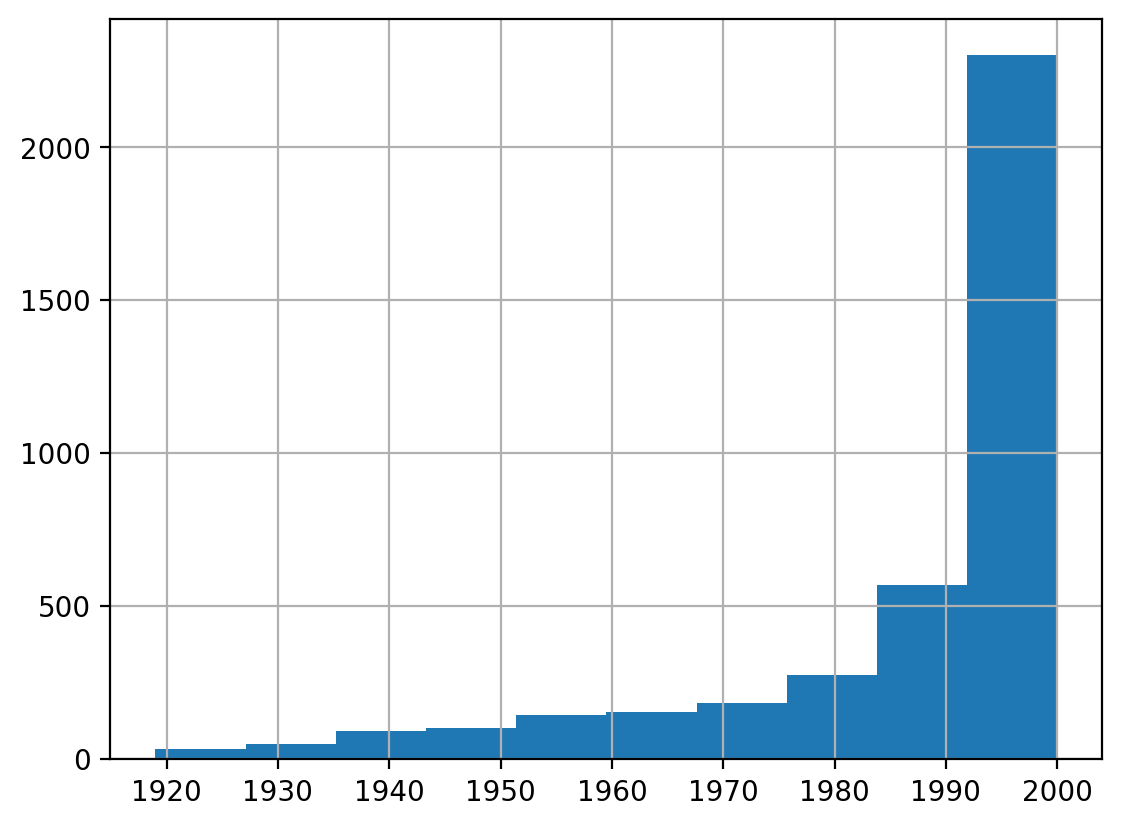

In [7]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 10
movies_2['year'].hist()
plt.show()

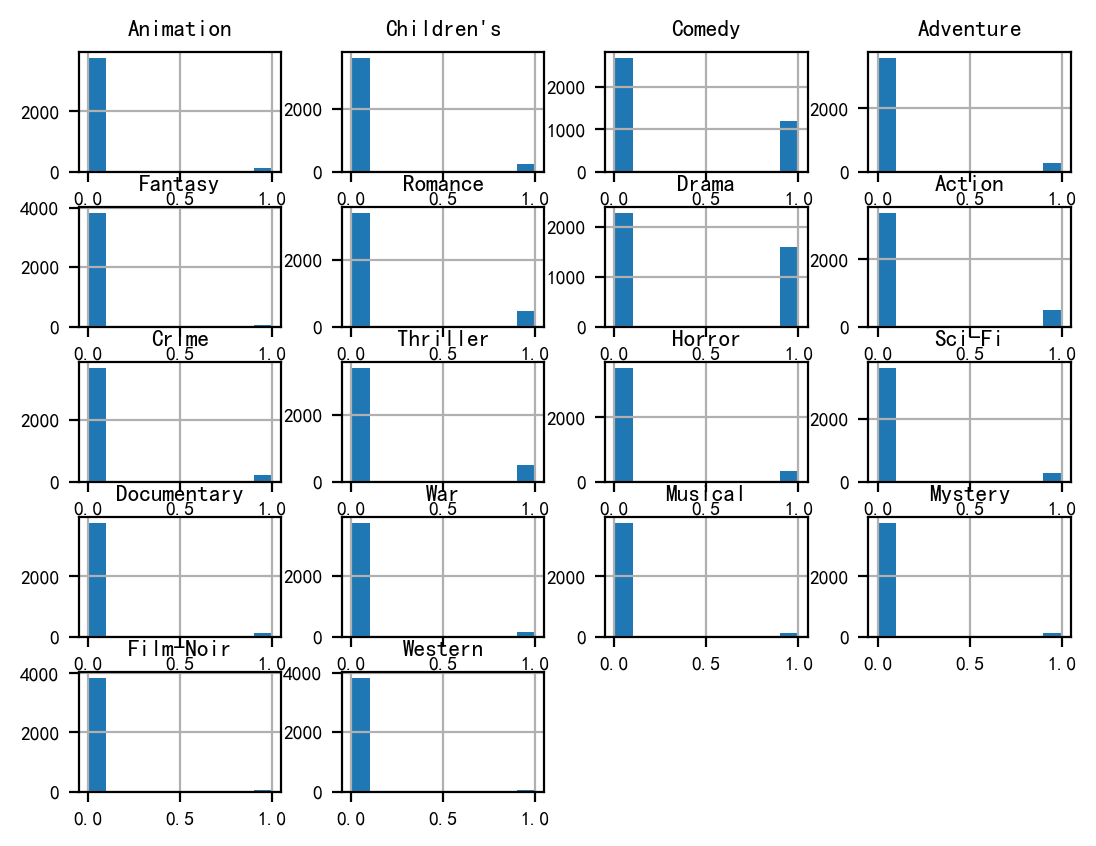

In [9]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 7
movies_2.iloc[:, 2:].hist()
plt.show()

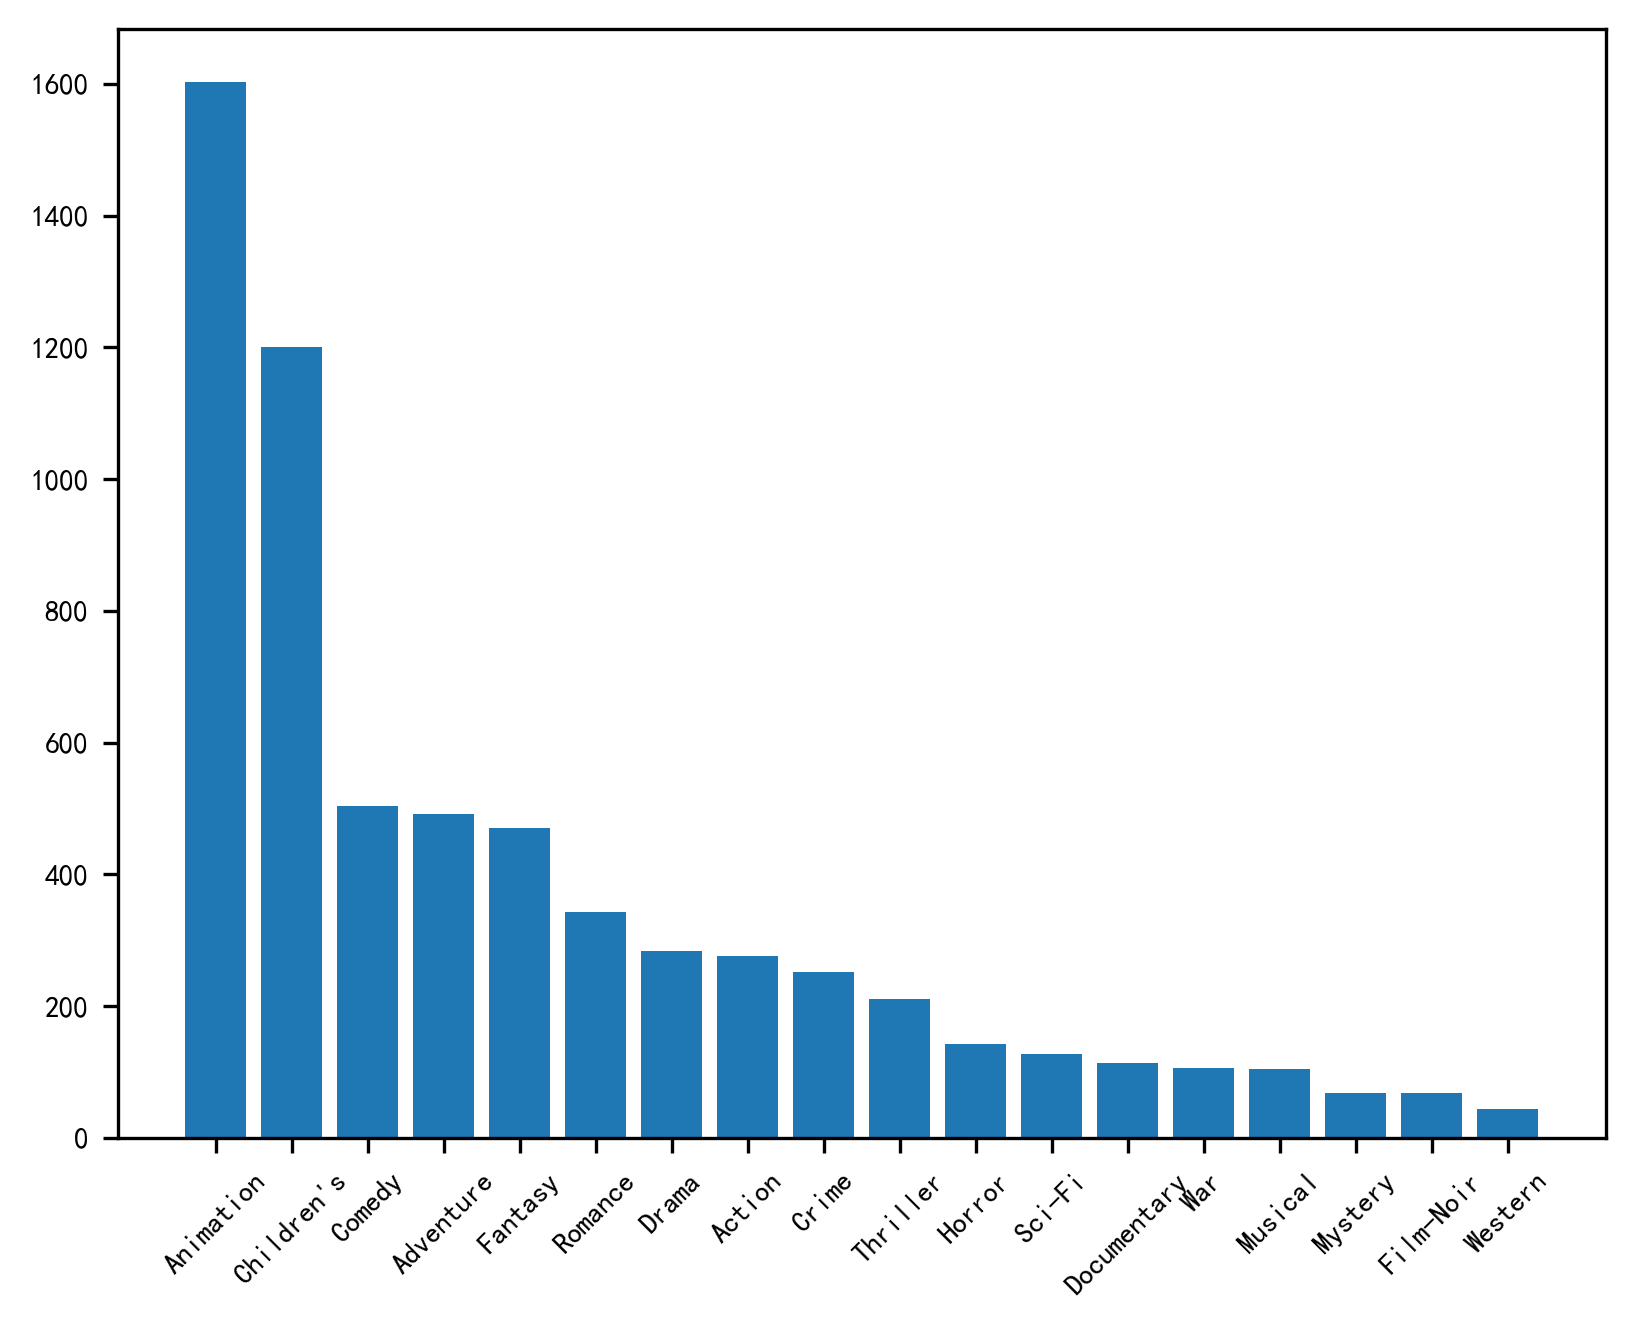

In [11]:
# 看看所有分类的数量
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 7
plt.bar(movies_2.iloc[:, 2:].columns,movies_2.iloc[:, 2:].sum().sort_values(ascending=False))
plt.xticks(movies_2.iloc[:, 2:].columns, rotation=45)
plt.show()

In [12]:
movies_2.to_csv("../temp/movies.csv")